## Live Project 

### Objective 
Sales director of the company is tasked with developing key sales statistical and analytical insights to grow the company to make informed business decisions. These analyses serves as evaluating agent performance, revenue, expenses and probability. These insights will help them to steer the agency towards sustained growth and success in dynamic entertainment landscape.


## Establishing SQL connection to Machine Learning

In [159]:
import pandas as pd
from sqlalchemy import create_engine # Takes in the connection URL and returns SQLALchemy Engine
import urllib #Handling URLs, parsing them and sending HTTP request

# DB credentials
server = 'qaececrm-s1.database.windows.net'  
database = 'QAECECRM_June2025'
username = 'dbadmin'
password = 'DashTech1234'
driver = 'ODBC Driver 17 for SQL Server'

# Create connection string
params = urllib.parse.quote_plus(
    f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

### Collecting and Generating the Tables From the Database

In [160]:
from sqlalchemy import text #to run raw SQL queries

def get_all_table(engine):
    with engine.connect() as conn:
        result = conn.execute(text("""SELECT t.name as table_name
                                  FROM sys.tables t
                                  ORDER BY t.name"""))
        table_list = [row[0] for row in result]
        table_df = pd.DataFrame(table_list, columns=['Name of the tables'])
    return table_df    


table_df = get_all_table(engine)
#table_list = table_df['Name of the tables'].tolist()
#print(table_list)
#Count of the tables
print(f"Total number of tables presented: {len(table_df)}")

table_df

Total number of tables presented: 189


,Name of the tables
0,AgentCommission
1,AgentCommissionProgram
2,AgentCommissionTypeData
3,AgentPayrollLog
4,Alert
...,...
184,VenueDescription
185,VenueGenreType
186,VenueRequirement
187,VenueRequirementNotification


# Preliminary Analysis

**Data Reading**

In [161]:
def load_table(engine, table_name):
    with engine.connect() as conn:
        query = text(f"SELECT * FROM {table_name}")
        df = pd.read_sql(query, conn) #Read SQL database 
    return df

In [162]:
table_name = "Offer" #Mention the table name that we want to mention
df = load_table(engine, table_name)

In [163]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingAddress2,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,BuyerFax,SignerName,SignerTitle,SignerEmail,SignerPhone,SignerFax,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalAddress2,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactTitle,VenueContactEmail,VenueContactPhone,VenueContactFax,ProductionCompany,ProductionContactName,ProductionContactPhone,ProductionContactEmail,ProductionContactWebsite,UrlKey,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,34161,800003,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,None,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,None,205-368-1196,None,Hunter Lawley,None,None,205-368-1196,None,Phi Kappa Psi Fraternity,800.0,1.0,True,[Unknown],965 University Blvd,None,Tuscaloosa,2,35401,1,[Unknown],None,None,[Unknown],None,None,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
1,34164,800004,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,None,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,None,205-368 1196,None,Hunter Lawley,None,None,205-368 1196,None,Kappa Alpha Fraternity,600.0,1.0,True,[Unknown],Fraternity Row,None,Starkville,26,99999,1,[Unknown],None,None,[Unknown],None,None,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
2,34165,800005,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,None,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,None,770-541 3027,None,Hunter Lawley,None,None,770-541 3027,None,Phi Gamma Delta Fraternity,600.0,1.0,True,[Unknown],300 W. 37th Street,None,Austin,44,99999,1,[Unknown],None,None,[Unknown],None,None,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
3,34166,800006,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,915 Main St. Ste D,None,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,None,Hunter Lawley,None,greg@datatouring.com,205-368-1196,None,Sigma Nu Fraternity,800.0,1.0,True,[Unknown],410 Poole Drive,None,Oxford,26,38655,1,[Unknown],None,None,[Unknown],None,None,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
4,34171,800007,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,None,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,None,Mark Letalien,None,EntArtNash@aol.com,678-713-8300,None,Tau Epsilon Phi,500.0,1.0,True,[Unknown],125 Greek Park Circle,None,Athens,11,30605,1,[Unknown],None,None,[Unknown],None,None,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN


In [164]:
df.shape

(38, 53)

# TASK - 1

## DATA CLEANING

In [165]:
#Checking null values
df.isnull().sum()

OfferId                      0
BlueCardId                   0
OfferStatusId                0
IsInProgress                 0
LineOfBusinessId            18
EventTicketTypeId           30
IsPrivateOffer              18
IsTicketedEvent             18
IsBuySell                   18
PresenterName                0
MailingAddress1              0
MailingAddress2              9
MailingCity                  0
MailingStateId               6
MailingZip                   0
MailingCountryId             6
BuyerName                    0
BuyerTitle                   0
BuyerEmail                   6
BuyerPhone                   0
BuyerFax                     9
SignerName                   0
SignerTitle                  9
SignerEmail                  6
SignerPhone                  0
SignerFax                    9
VenueName                    0
VenueCapacity               11
VenueSettingId               7
IsSettingCovered             0
TicketOutlet                 0
VenuePhysicalAddress1        0
VenuePhy

In [166]:
#Printing null values along with their datatypes
null_info = df.isnull().sum()
null_columns = null_info[null_info > 0]

null_val = pd.DataFrame({
    'Data Type': df[null_columns.index].dtypes,
    'Null Count': null_columns
})

null_val

,Data Type,Null Count
LineOfBusinessId,float64,18
EventTicketTypeId,float64,30
IsPrivateOffer,object,18
IsTicketedEvent,object,18
IsBuySell,object,18
MailingAddress2,object,9
MailingStateId,float64,6
MailingCountryId,float64,6
BuyerEmail,object,6
BuyerFax,object,9


In [167]:
#Filling null values for numerical and categorical columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            df[col].fillna(df[col].median(), inplace=True) # median
        elif df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True) # Mode

In [168]:
#For datetime
df['UpdatedDate'].fillna(pd.to_datetime('today'), inplace=True) #fill with current date

In [169]:
df.isnull().sum()

OfferId                     0
BlueCardId                  0
OfferStatusId               0
IsInProgress                0
LineOfBusinessId            0
EventTicketTypeId           0
IsPrivateOffer              0
IsTicketedEvent             0
IsBuySell                   0
PresenterName               0
MailingAddress1             0
MailingAddress2             0
MailingCity                 0
MailingStateId              0
MailingZip                  0
MailingCountryId            0
BuyerName                   0
BuyerTitle                  0
BuyerEmail                  0
BuyerPhone                  0
BuyerFax                    0
SignerName                  0
SignerTitle                 0
SignerEmail                 0
SignerPhone                 0
SignerFax                   0
VenueName                   0
VenueCapacity               0
VenueSettingId              0
IsSettingCovered            0
TicketOutlet                0
VenuePhysicalAddress1       0
VenuePhysicalAddress2       0
VenuePhysi

In [170]:
#Checking Outliers 

data_cols = df.select_dtypes(include=['float64']).columns

#Loop each column to detect outliers
outlier_summary = {}

for col in data_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        'outlier count' : len(outliers),
        'lower bound' : lower_bound,
        'upper bound' : upper_bound
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.sort_values(by='outlier count', ascending=False)

,outlier count,lower bound,upper bound
MailingCountryId,9.0,1.00,1.00
LineOfBusinessId,8.0,1.00,1.00
UpdatedById,5.0,277.00,277.00
MailingStateId,4.0,11.75,49.75
VenueSettingId,2.0,1.00,1.00
PresenterSignatureId,2.0,1014.00,1014.00
EventTicketTypeId,0.0,2.00,2.00
VenueCapacity,0.0,-656.25,2793.75


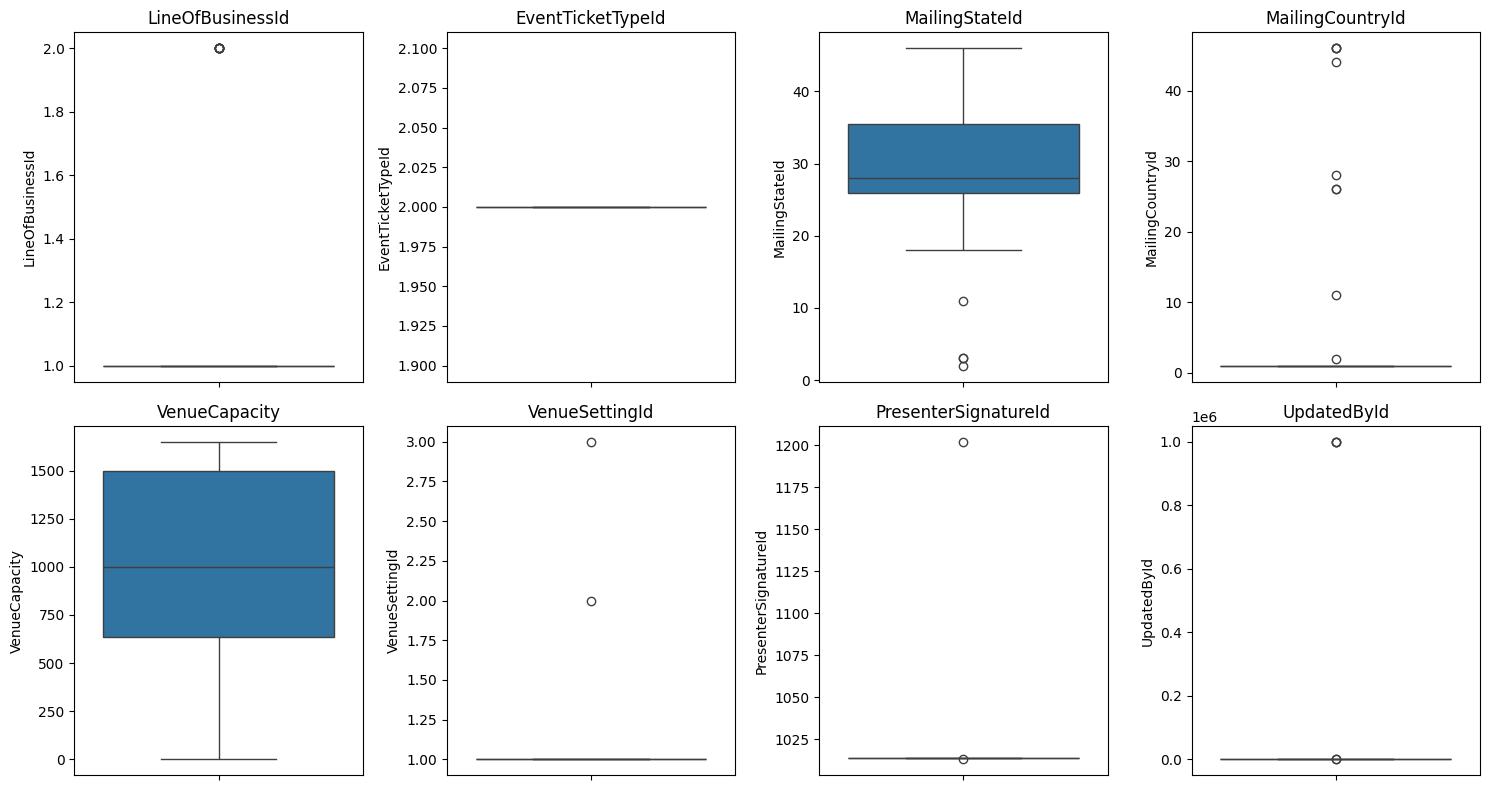

In [171]:
#Visualizing the outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

for i, col in enumerate(data_cols, 1):
    plt.subplot(2, (len(data_cols)+1)//2, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [172]:
#Checking Duplicates
duplicate = df.duplicated().any()
duplicate

False

There are no duplicates present

In [173]:
pd.set_option('display.max_columns', None)
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingAddress2,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,BuyerFax,SignerName,SignerTitle,SignerEmail,SignerPhone,SignerFax,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalAddress2,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactTitle,VenueContactEmail,VenueContactPhone,VenueContactFax,ProductionCompany,ProductionContactName,ProductionContactPhone,ProductionContactEmail,ProductionContactWebsite,UrlKey,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,,205-368-1196,,Hunter Lawley,,,205-368-1196,,Phi Kappa Psi Fraternity,800.0,1.0,True,[Unknown],965 University Blvd,,Tuscaloosa,2,35401,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,,205-368 1196,,Hunter Lawley,,,205-368 1196,,Kappa Alpha Fraternity,600.0,1.0,True,[Unknown],Fraternity Row,,Starkville,26,99999,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,,770-541 3027,,Hunter Lawley,,,770-541 3027,,Phi Gamma Delta Fraternity,600.0,1.0,True,[Unknown],300 W. 37th Street,,Austin,44,99999,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,,Hunter Lawley,,greg@datatouring.com,205-368-1196,,Sigma Nu Fraternity,800.0,1.0,True,[Unknown],410 Poole Drive,,Oxford,26,38655,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,,Mark Letalien,,EntArtNash@aol.com,678-713-8300,,Tau Epsilon Phi,500.0,1.0,True,[Unknown],125 Greek Park Circle,,Athens,11,30605,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0


In [174]:
#Dropping columns which are having empty or blank data
df = df.drop(columns=['ProductionContactName', 
                      'ProductionContactPhone', 
                      'ProductionContactEmail', 
                      'ProductionContactWebsite',
                      'MailingAddress2',
                      'BuyerFax',
                      'SignerTitle',
                      'SignerFax',
                      'VenuePhysicalAddress2',
                      'VenueContactTitle',	
                      'VenueContactEmail',
                      'VenueContactFax',
                      'ProductionCompany',
                      'UrlKey'])

In [175]:
pd.set_option('display.max_columns', None)
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,SignerName,SignerEmail,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactPhone,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,,205-368-1196,Hunter Lawley,,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,[Unknown],965 University Blvd,Tuscaloosa,2,35401,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,,205-368 1196,Hunter Lawley,,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,[Unknown],Fraternity Row,Starkville,26,99999,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,,770-541 3027,Hunter Lawley,,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,[Unknown],300 W. 37th Street,Austin,44,99999,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,Hunter Lawley,greg@datatouring.com,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,[Unknown],410 Poole Drive,Oxford,26,38655,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,Mark Letalien,EntArtNash@aol.com,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,[Unknown],125 Greek Park Circle,Athens,11,30605,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0


Dealing columns with unknown and some blank data in some rows

## Feature Engineering

In [176]:
import numpy as np
df.replace('[Unknown]', np.nan, inplace=True)

In [177]:
df['Has_TicketOutlet'] = df['TicketOutlet'].replace('[Unknown]', np.nan).notna().astype(int)
df['Has_VenueContactName'] = df['VenueContactName'].replace('[Unknown]', np.nan).notna().astype(int)
df['Has_VenueContactPhone'] = df['VenueContactPhone'].replace('[Unknown]', np.nan).notna().astype(int)

In [178]:
df['HasBuyerEmail'] = df['BuyerEmail'].notna().astype(int)
df['HasSignerEmail'] = df['SignerEmail'].notna().astype(int)

In [179]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,SignerName,SignerEmail,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactPhone,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone,HasBuyerEmail,HasSignerEmail
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,,205-368-1196,Hunter Lawley,,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,NaN,965 University Blvd,Tuscaloosa,2,35401,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,,205-368 1196,Hunter Lawley,,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,NaN,Fraternity Row,Starkville,26,99999,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,,770-541 3027,Hunter Lawley,,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,NaN,300 W. 37th Street,Austin,44,99999,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,Hunter Lawley,greg@datatouring.com,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,NaN,410 Poole Drive,Oxford,26,38655,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,Mark Letalien,EntArtNash@aol.com,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,NaN,125 Greek Park Circle,Athens,11,30605,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1


In [180]:
#Dropping columns after creating flags 
df = df.drop(columns=['BuyerEmail','SignerEmail','TicketOutlet','VenueContactName','VenueContactPhone'])

Different types of data cleaning 
* Dealing with null values
* Dealing with Unknowns
* Dealing with some missing data in some columns

In [181]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerPhone,SignerName,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone,HasBuyerEmail,HasSignerEmail
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,965 University Blvd,Tuscaloosa,2,35401,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,205-368 1196,Hunter Lawley,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,Fraternity Row,Starkville,26,99999,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,770-541 3027,Hunter Lawley,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,300 W. 37th Street,Austin,44,99999,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,410 Poole Drive,Oxford,26,38655,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,678-713-8300,Mark Letalien,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,125 Greek Park Circle,Athens,11,30605,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0,1,1


## Correlation Analysis

In [182]:
#Drop columns with constant values 
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index # correlation cant be done if columns are having bool values so we drop them
df = df.drop(columns=cols_to_drop)

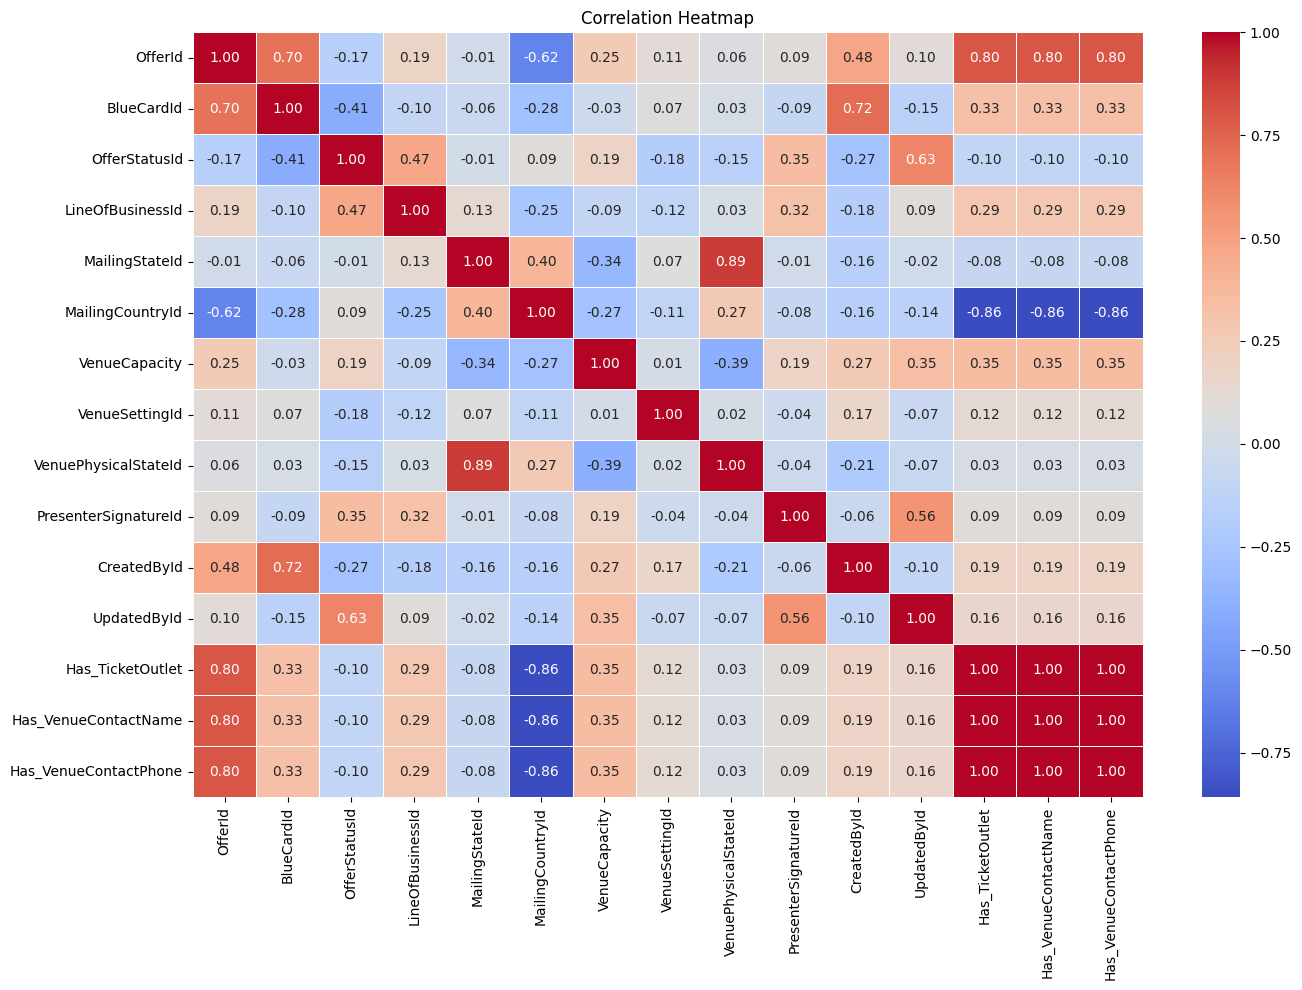

In [183]:
# Compute correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [184]:
df.shape

(38, 34)

In [185]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerPhone,SignerName,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,34161,800003,2,False,1.0,True,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,965 University Blvd,Tuscaloosa,2,35401,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0
1,34164,800004,2,False,1.0,True,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,205-368 1196,Hunter Lawley,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,Fraternity Row,Starkville,26,99999,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0
2,34165,800005,2,False,1.0,True,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,770-541 3027,Hunter Lawley,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,300 W. 37th Street,Austin,44,99999,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0
3,34166,800006,2,False,1.0,True,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,410 Poole Drive,Oxford,26,38655,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0
4,34171,800007,2,False,1.0,True,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,678-713-8300,Mark Letalien,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,125 Greek Park Circle,Athens,11,30605,1014.0,2018-06-02 04:07:29.963,0,2025-06-21 18:37:43.226127,277.0,0,0,0


**Dropping columns to proceed for visualizations of the data**

In [186]:
df_clean = df.drop(columns=['OfferId',
                'BuyerPhone',
                'BuyerName',
                'BlueCardId',
                'BuyerTitle',
                'SignerPhone',
                'MailingAddress1',
                'MailingCity',
                'MailingZip',
                'MailingStateId',
                'VenuePhysicalAddress1',
                'VenuePhysicalZip',
                'CreatedDate',
                'UpdatedDate',
                'PresenterSignatureId'],axis=1)


In [187]:
df_clean.head()

,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,PresenterName,MailingCountryId,SignerName,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalCity,VenuePhysicalStateId,CreatedById,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,2,False,1.0,True,False,EastCoast Entertainment,2.0,Hunter Lawley,Phi Kappa Psi Fraternity,800.0,1.0,True,Tuscaloosa,2,0,277.0,0,0,0
1,2,False,1.0,True,False,EastCoast Entertainment,26.0,Hunter Lawley,Kappa Alpha Fraternity,600.0,1.0,True,Starkville,26,0,277.0,0,0,0
2,2,False,1.0,True,False,EastCoast Entertainment,44.0,Hunter Lawley,Phi Gamma Delta Fraternity,600.0,1.0,True,Austin,44,0,277.0,0,0,0
3,2,False,1.0,True,False,EastCoast Entertainment,26.0,Hunter Lawley,Sigma Nu Fraternity,800.0,1.0,True,Oxford,26,0,277.0,0,0,0
4,2,False,1.0,True,False,EastCoast Entertainment,11.0,Mark Letalien,Tau Epsilon Phi,500.0,1.0,True,Athens,11,0,277.0,0,0,0


## DATA VISUALIZATION

/tmp/ipykernel_2990/4185205394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PresenterName',


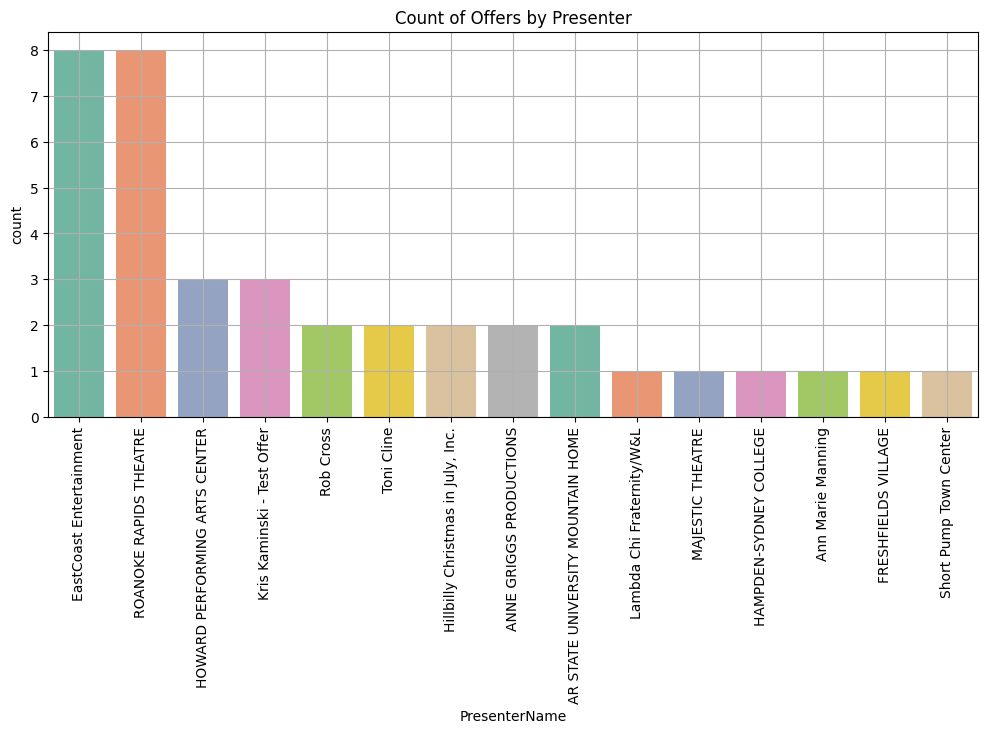

In [188]:
#Count plot for PresenterName
plt.figure(figsize=(12, 5))
sns.countplot(x='PresenterName', 
            data=df_clean, order=df_clean['PresenterName'].value_counts().index,
            palette='Set2')
plt.title('Count of Offers by Presenter')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [189]:
df_clean['PresenterName'].value_counts()

EastCoast Entertainment              8
ROANOKE RAPIDS THEATRE               8
HOWARD PERFORMING ARTS CENTER        3
Kris Kaminski - Test Offer           3
Rob Cross                            2
Toni Cline                           2
Hillbilly Christmas in July, Inc.    2
ANNE GRIGGS PRODUCTIONS              2
AR STATE UNIVERSITY MOUNTAIN HOME    2
Lambda Chi Fraternity/W&L            1
MAJESTIC THEATRE                     1
HAMPDEN-SYDNEY COLLEGE               1
Ann Marie Manning                    1
FRESHFIELDS VILLAGE                  1
Short Pump Town Center               1
Name: PresenterName, dtype: int64

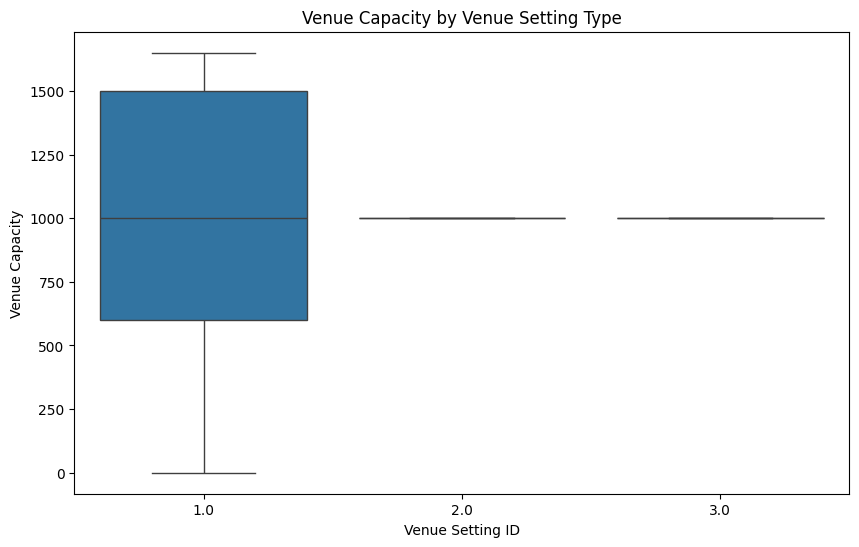

In [190]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='VenueSettingId', y='VenueCapacity', data=df_clean)
plt.title('Venue Capacity by Venue Setting Type')
plt.xlabel('Venue Setting ID')
plt.ylabel('Venue Capacity')
plt.show()

Venue Setting ID 1.0 has nearly a capacity of over 1600 indicating high variability in venue size 

In [191]:
df_clean['VenueSettingId'].value_counts()

1.0    36
3.0     1
2.0     1
Name: VenueSettingId, dtype: int64

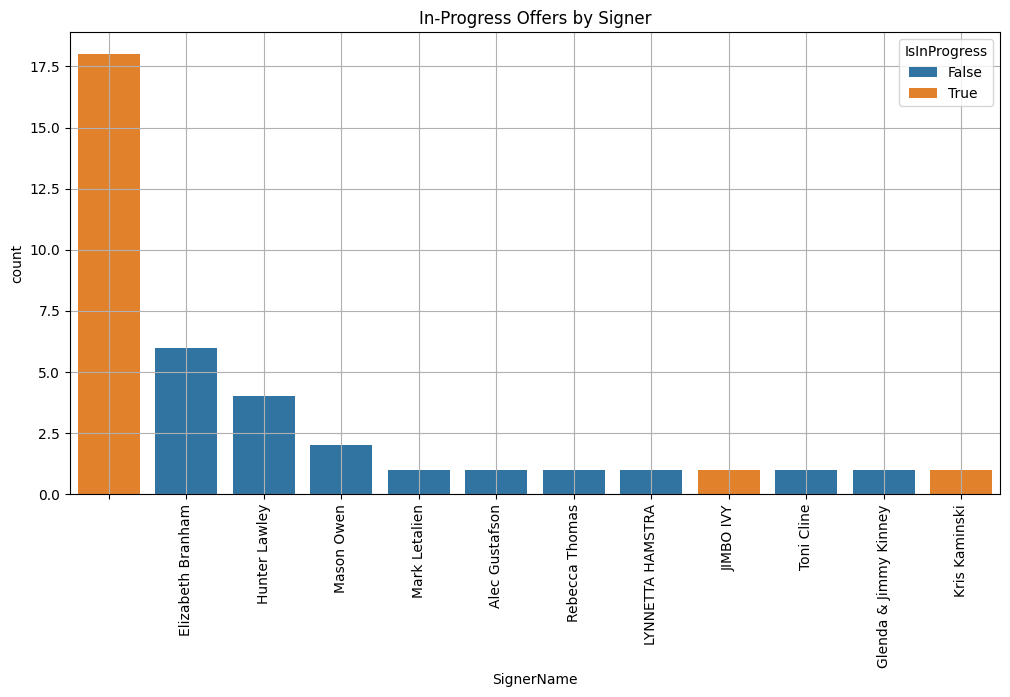

In [192]:
plt.figure(figsize=(12, 6))
sns.countplot(x='SignerName', hue='IsInProgress', data=df_clean,
              order=df_clean['SignerName'].value_counts().index)
plt.title('In-Progress Offers by Signer')
plt.xticks(rotation=90)
plt.grid()
plt.show()

/tmp/ipykernel_2990/1789616557.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VenueName',


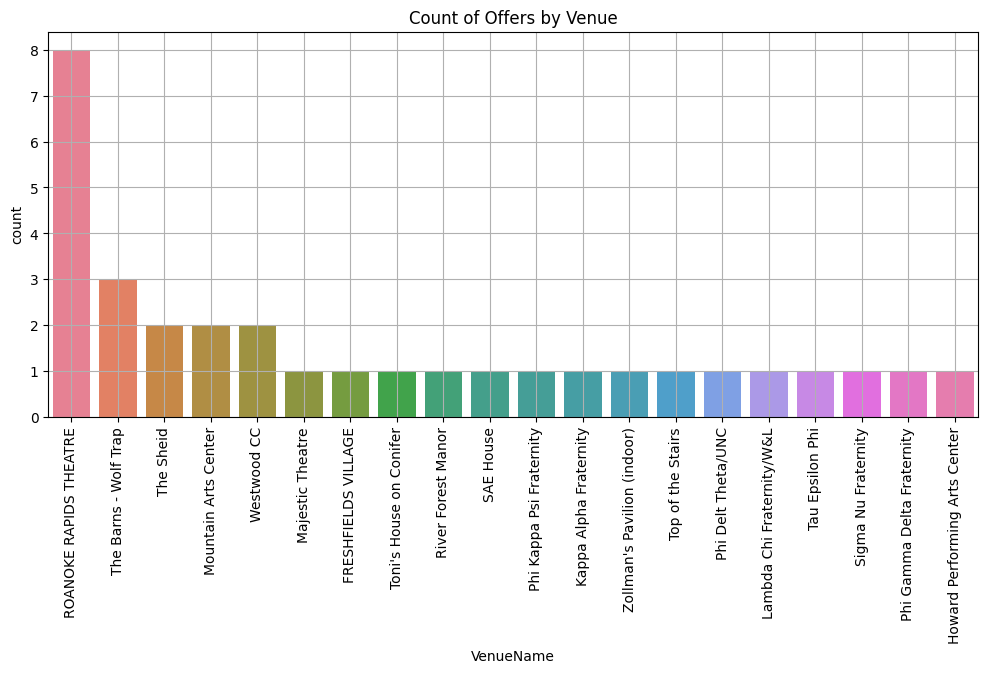

In [193]:
#Count plot for VenueName
df_venue = df_clean[df_clean['VenueName'].notna() & (df_clean['VenueName'].str.strip() != '')]

plt.figure(figsize=(12, 5))
sns.countplot(x='VenueName', 
            data=df_venue, order=df_venue['VenueName'].value_counts().index,
            palette='husl')
plt.title('Count of Offers by Venue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

/tmp/ipykernel_2990/2420195453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_ticket['IsTicketedEvent'].map({True: 1, False: 0}),


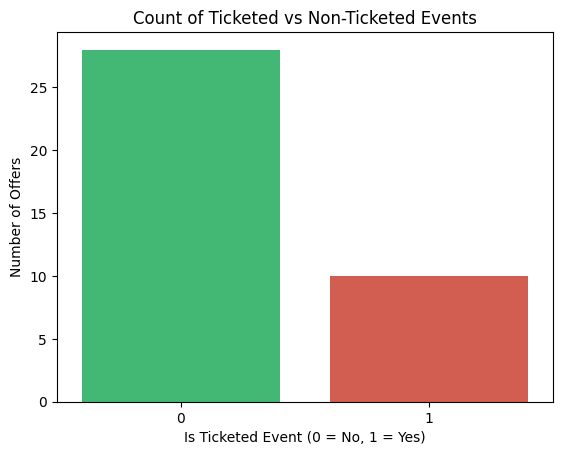

In [194]:
# Plotting the count of Ticketed vs Non-Ticketed events
df_ticket = df_clean
sns.countplot(x=df_ticket['IsTicketedEvent'].map({True: 1, False: 0}),
              palette=['#2ecc71', '#e74c3c'])  # Green for 0, Red for 1
plt.title('Count of Ticketed vs Non-Ticketed Events')
plt.xlabel('Is Ticketed Event (0 = No, 1 = Yes)')
plt.ylabel('Number of Offers')
plt.show()

'0' indicates most of the event are non tickets  and rest '1' are ticket events

/tmp/ipykernel_2990/3934157724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_progress['IsInProgress'].map({True: 1, False: 0}),


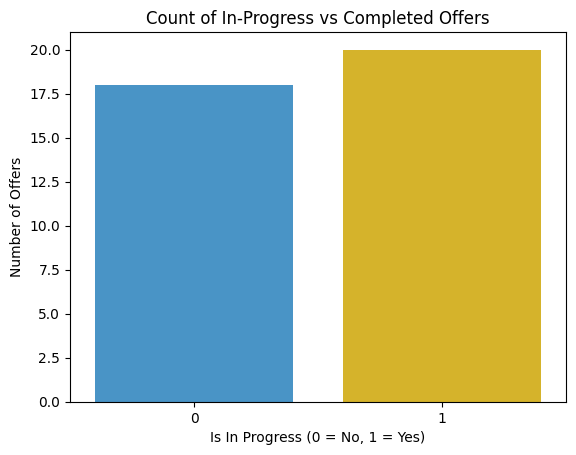

In [195]:
# Plot for IsInProgress column
df_progress = df_clean
sns.countplot(x=df_progress['IsInProgress'].map({True: 1, False: 0}), 
             palette=['#3498db', '#f1c40f'])  # Blue for 0, Yellow for 1
plt.title('Count of In-Progress vs Completed Offers')
plt.xlabel('Is In Progress (0 = No, 1 = Yes)')
plt.ylabel('Number of Offers')
plt.show()

Most offers are currently in progress which means that there are high volume of active campaigns, sales events, or promotional offers being managed at the moment.

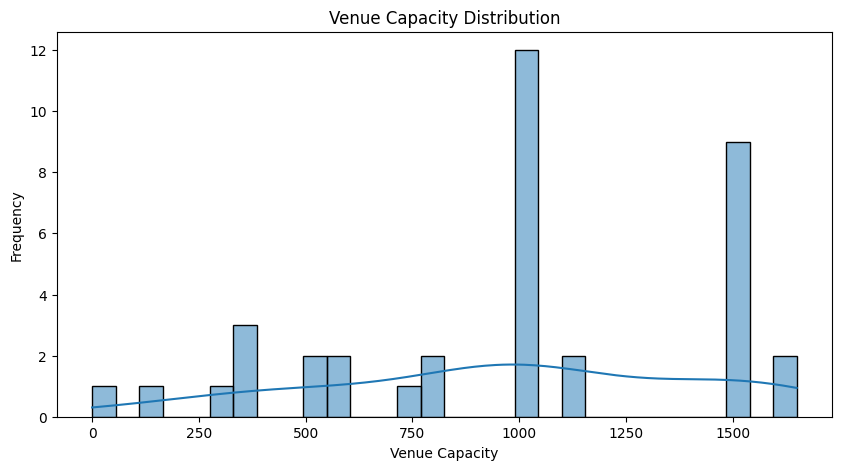

In [ ]:
# Venue capacity distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['VenueCapacity'], kde=True, bins=30)
plt.title('Venue Capacity Distribution')
plt.xlabel('Venue Capacity')
plt.ylabel('Frequency')
plt.show()

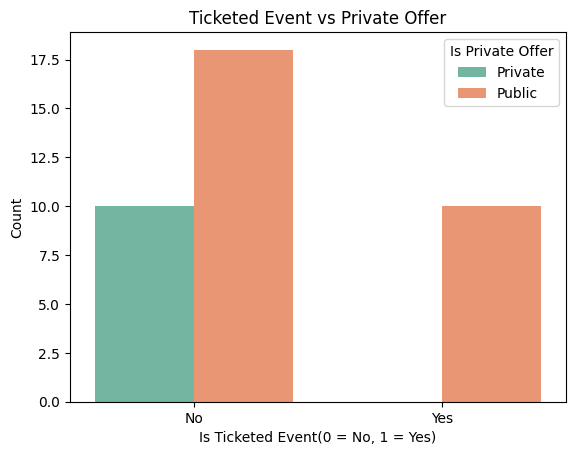

In [197]:
df_ticketEvent = df_clean.copy()

df_ticketEvent['IsTicketedEvent'] = df_ticketEvent['IsTicketedEvent'].map({False: 'No', True: 'Yes'})
df_ticketEvent['IsPrivateOffer'] = df_ticketEvent['IsPrivateOffer'].map({False: 'Public', True: 'Private'})

sns.countplot(x='IsTicketedEvent', hue='IsPrivateOffer', data=df_ticketEvent, palette='Set2')
plt.title('Ticketed Event vs Private Offer')
plt.xlabel('Is Ticketed Event(0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Is Private Offer')
plt.show()

* For yes under is the ticketed event which is public and none of them are private
* For non ticketed event both public and private offers exist

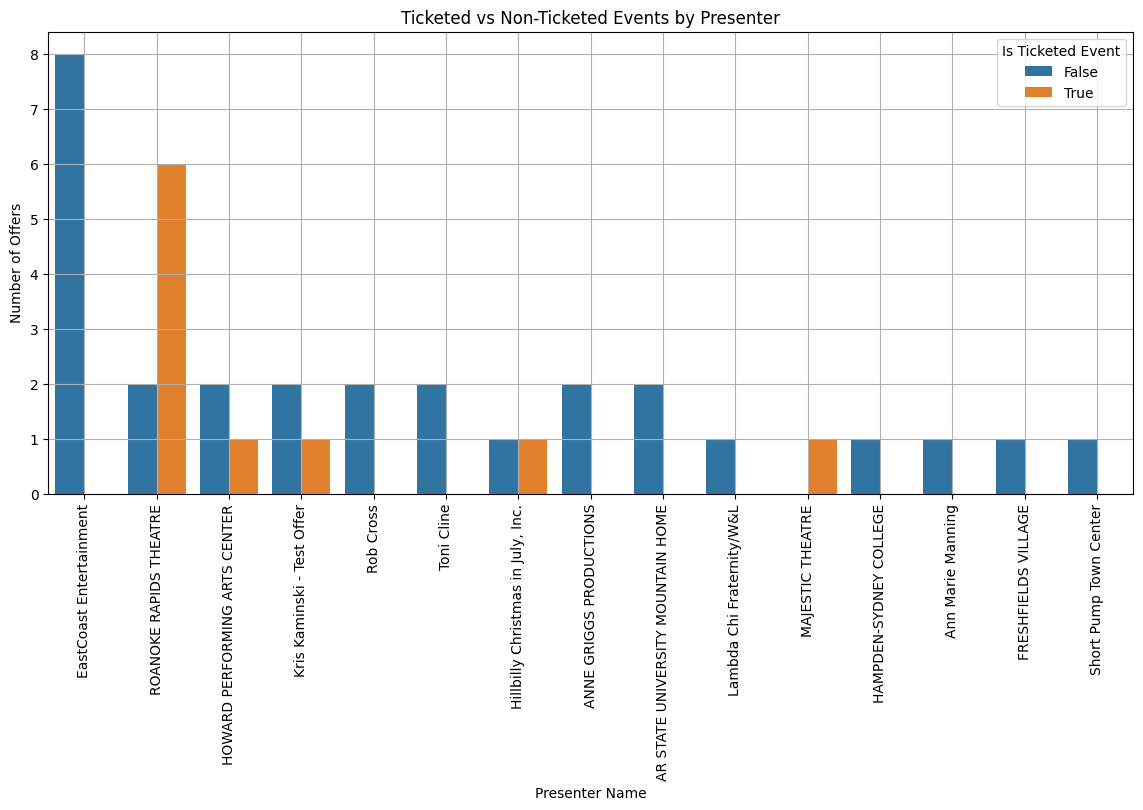

In [198]:
#PresenterName vs IsTicketedEvent

plt.figure(figsize=(14, 6))
sns.countplot(x='PresenterName', hue='IsTicketedEvent', data=df_clean,
              order=df_clean['PresenterName'].value_counts().index)
plt.title('Ticketed vs Non-Ticketed Events by Presenter')
plt.xticks(rotation=90)
plt.xlabel('Presenter Name')
plt.ylabel('Number of Offers')
plt.legend(title='Is Ticketed Event')
plt.grid()
plt.show()

Helps analyze which presenters tend to host ticketed events more often.

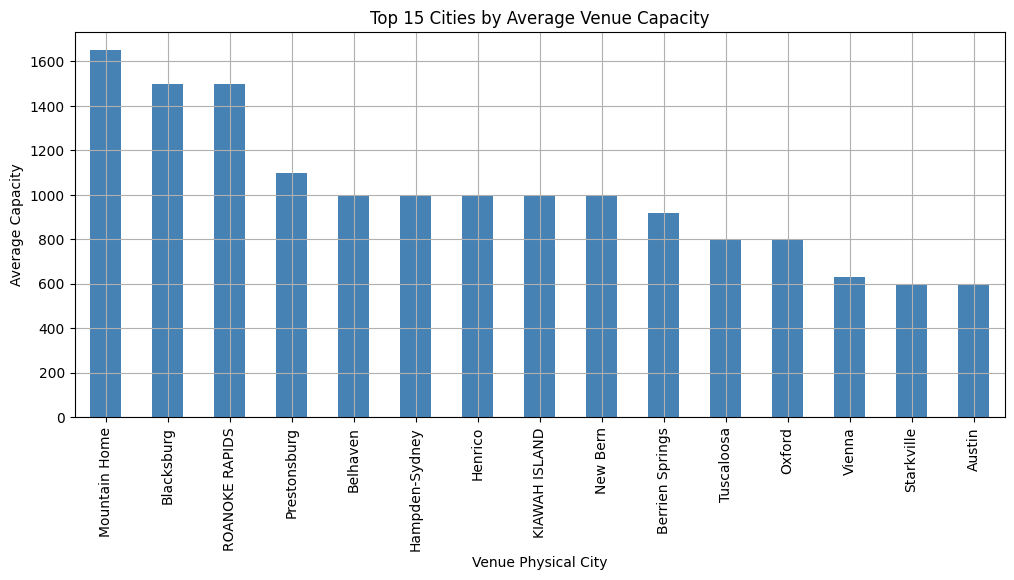

In [ ]:
city_capacity = df_clean.groupby('VenuePhysicalCity')['VenueCapacity'].mean().sort_values(ascending=False).head(15)

city_capacity.plot(kind='bar', figsize=(12, 5), color='steelblue')
plt.title('Top 15 Cities by Average Venue Capacity')
plt.ylabel('Average Capacity')
plt.xlabel('Venue Physical City')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Discover which cities are hubs for large-scale events.

In [199]:
df_present = df_clean[['PresenterName', 'SignerName', 'VenueName']].value_counts()
df_present = df_present.reset_index(name='Count')  
df_present = df_present.sort_values(by='Count', ascending=False)
df_present

,PresenterName,SignerName,VenueName,Count
0,ROANOKE RAPIDS THEATRE,Elizabeth Branham,ROANOKE RAPIDS THEATRE,6
2,AR STATE UNIVERSITY MOUNTAIN HOME,,The Sheid,2
3,Rob Cross,,Westwood CC,2
4,ROANOKE RAPIDS THEATRE,,ROANOKE RAPIDS THEATRE,2
5,Kris Kaminski - Test Offer,,The Barns - Wolf Trap,2
6,HOWARD PERFORMING ARTS CENTER,,,2
1,ANNE GRIGGS PRODUCTIONS,,,2
17,EastCoast Entertainment,Hunter Lawley,Phi Kappa Psi Fraternity,1
25,EastCoast Entertainment,Mason Owen,Zollman's Pavilion (indoor),1
24,EastCoast Entertainment,Rebecca Thomas,Phi Delt Theta/UNC,1


##### Key findings

* The ROANOKE RAPIDS THEATRE and Elizabeth Branham teamed up six times at the same venue. That suggests a trusted partnership or recurring event series.

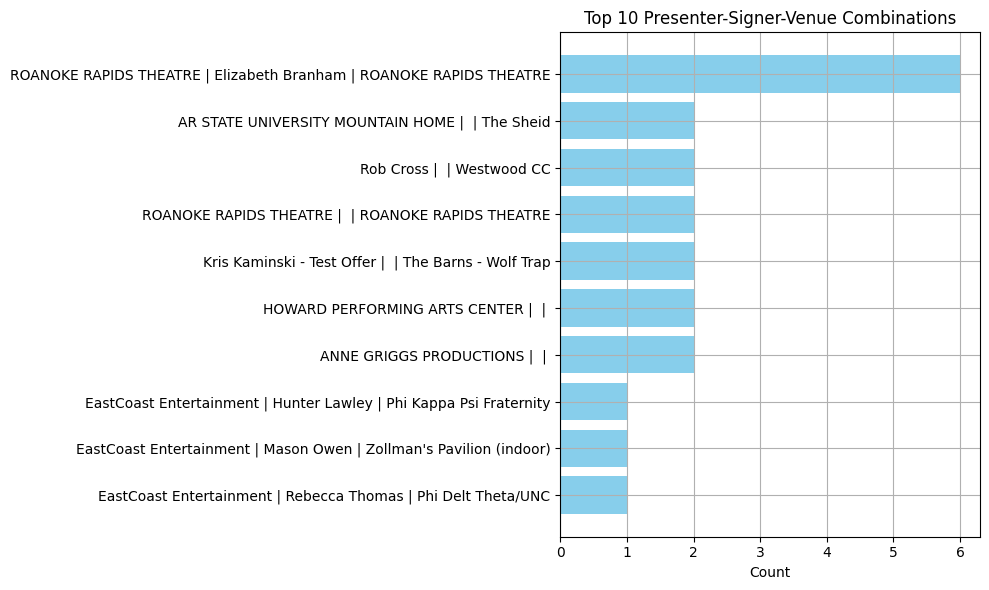

In [150]:
df_present['Label'] = df_present['PresenterName'] + ' | ' + df_present['SignerName'] + ' | ' + df_present['VenueName']

# Plot the top 10 most frequent combinations
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(df_present['Label'][:top_n][::-1], df_present['Count'][:top_n][::-1], color='skyblue')
plt.xlabel('Count')
plt.title(f'Top {top_n} Presenter-Signer-Venue Combinations')
plt.tight_layout()
plt.grid()
plt.show()

**Performing Encoding for Categorical Variables**

In [207]:
#Columns to encode
binary_columns = ['IsInProgress', 'IsPrivateOffer', 'IsTicketedEvent', 'IsSettingCovered']

# Convert True/False or int values to 0/1
for col in binary_columns:
    df_clean[col] = df_clean[col].astype(int)

In [208]:
df_clean.head()

,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,PresenterName,MailingCountryId,SignerName,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalCity,VenuePhysicalStateId,CreatedById,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,2,0,1.0,1,0,EastCoast Entertainment,2.0,Hunter Lawley,Phi Kappa Psi Fraternity,800.0,1.0,1,Tuscaloosa,2,0,277.0,0,0,0
1,2,0,1.0,1,0,EastCoast Entertainment,26.0,Hunter Lawley,Kappa Alpha Fraternity,600.0,1.0,1,Starkville,26,0,277.0,0,0,0
2,2,0,1.0,1,0,EastCoast Entertainment,44.0,Hunter Lawley,Phi Gamma Delta Fraternity,600.0,1.0,1,Austin,44,0,277.0,0,0,0
3,2,0,1.0,1,0,EastCoast Entertainment,26.0,Hunter Lawley,Sigma Nu Fraternity,800.0,1.0,1,Oxford,26,0,277.0,0,0,0
4,2,0,1.0,1,0,EastCoast Entertainment,11.0,Mark Letalien,Tau Epsilon Phi,500.0,1.0,1,Athens,11,0,277.0,0,0,0


In [209]:
#Dropping out PresenterName, SignerName and VenueName as it has too many unique categories, and some column has missing values

df_cleaned = df_clean.drop(columns=['PresenterName','SignerName','VenueName','VenuePhysicalCity'],axis=1)
df_cleaned.head()

,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,MailingCountryId,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalStateId,CreatedById,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,2,0,1.0,1,0,2.0,800.0,1.0,1,2,0,277.0,0,0,0
1,2,0,1.0,1,0,26.0,600.0,1.0,1,26,0,277.0,0,0,0
2,2,0,1.0,1,0,44.0,600.0,1.0,1,44,0,277.0,0,0,0
3,2,0,1.0,1,0,26.0,800.0,1.0,1,26,0,277.0,0,0,0
4,2,0,1.0,1,0,11.0,500.0,1.0,1,11,0,277.0,0,0,0
